In [1]:
import os
import fnmatch

import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import binned_statistic_2d

from GHEAnalysisLib import import_all_spain_data_sets_in_dir_to_dataframe
from GHEAnalysisLib import load_stored_dataframes_from_csv_to_single_dataframe
from GHEAnalysisLib import write_annual_csv_files
from GHEAnalysisLib import get_spain_resource_files

import matplotlib.pyplot as plt
%matplotlib inline

from CoolProp.CoolProp import PropsSI

import numpy as np

plt.style.use('ggplot')

# Import raw data from original files

Repository contains daily data files that contain minutely data. Data are imported by year (except for year 2011) due to the repository data structure. It can take some time to import all of the data files. As is, on my machine it took 1-2 hours to import all of the data from the individual files.

Note: some of the cells are commented out because later work supercedes their usage. They are preserved in comments though.

In [2]:
# data_2005 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2005'
# df_2005 = import_all_spain_data_sets_in_dir_to_dataframe(data_2005)

In [3]:
# data_2006 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2006'
# df_2006 = import_all_spain_data_sets_in_dir_to_dataframe(data_2006)

In [4]:
# data_2007 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2007'
# df_2007 = import_all_spain_data_sets_in_dir_to_dataframe(data_2007)

In [5]:
# data_2008 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2008'
# df_2008 = import_all_spain_data_sets_in_dir_to_dataframe(data_2008)

In [6]:
# data_2009 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2009'
# df_2009 = import_all_spain_data_sets_in_dir_to_dataframe(data_2009)

In [7]:
# data_2010= 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2010'
# df_2010 = import_all_spain_data_sets_in_dir_to_dataframe(data_2010)

In [8]:
# data_2011_a = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2011'
# df_2011_a = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_a)

In [9]:
# data_2011_b = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2011'
# df_2011_b = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_b)

In [10]:
# data_2012 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2012'
# df_2012 = import_all_spain_data_sets_in_dir_to_dataframe(data_2012)

In [11]:
# data_2013 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2013'
# df_2013 = import_all_spain_data_sets_in_dir_to_dataframe(data_2013)

In [12]:
# data_2014 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2014'
# df_2014 = import_all_spain_data_sets_in_dir_to_dataframe(data_2014)

In [13]:
# data_2015 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2015'
# df_2015 = import_all_spain_data_sets_in_dir_to_dataframe(data_2015)

# Dump the data to annual data files (almost)

Since it takes so long to import all of the original data files, the files are dumped to a CSV file which make it easier to reimport the raw data when needed.

Data are dumped to CSV files, but Pandas supports a number of other file types. When testing HDF5, the read/write speed was much faster than for CSV files, however, CSV files have the advantage in that they are human readable, whereas HDF5 is binary.

In [14]:
# See example here for how to read/write HDF5 data
# https://stackoverflow.com/a/17098736/5965685

# df_2005.to_csv('.\\UPV_Data\\2005_Raw.csv')

In [15]:
# df_2006.to_csv('.\\UPV_Data\\2006_Raw.csv')

In [16]:
# df_2007.to_csv('.\\UPV_Data\\2007_Raw.csv')

In [17]:
# df_2008.to_csv('.\\UPV_Data\\2008_Raw.csv')

In [18]:
# df_2009.to_csv('.\\UPV_Data\\2009_Raw.csv')

In [19]:
# df_2010.to_csv('.\\UPV_Data\\2010_Raw.csv')

In [20]:
# df_2011_a.to_csv('.\\UPV_Data\\2011_a_Raw.csv')

In [21]:
# df_2011_b.to_csv('.\\UPV_Data\\2011_b_Raw.csv')

In [22]:
# df_2012.to_csv('.\\UPV_Data\\2012_Raw.csv')

In [23]:
# df_2013.to_csv('.\\UPV_Data\\2013_Raw.csv')

In [24]:
# df_2014.to_csv('.\\UPV_Data\\2014_Raw.csv')

In [25]:
# df_2015.to_csv('.\\UPV_Data\\2015_Raw.csv')

# Incorporate reference data

The data repository contains the raw __minutely__, numeric data, but it also contains __daily__ qualitative data which indicates if the system is "ON/OFF" if the data is valid ("YES/NO").

These data have to be merged before any analysis can occur

In [26]:
# df_raw = load_stored_dataframes_from_csv_to_single_dataframe('.\\UPV_Data')

In [27]:
# df_ref = get_spain_resource_files('..\\Ruiz-Calvo_et_al_2016_data')

In [29]:
# https://stackoverflow.com/questions/49182288/combine-dataframes-with-minute-and-date-indexes

# df_merge = pd.merge_asof(df_raw, df_ref, left_index=True, right_index=True)
# df_merge.head(2)

In [30]:
# mask = df_merge['Representative Data'] == 'YES'

In [31]:
# df_valid = df_merge[mask]
# df_valid.head(2)

# Finally, we have data which can be used

The data are dumped to annual CSV files for ease of usage later.

In [32]:
# write_annual_csv_files(df_valid, 2005, 2015, '.\\UPV_Data', 'Raw_DeDuped_Valid')

In [34]:
df = load_stored_dataframes_from_csv_to_single_dataframe('.\\UPV_Data\\Raw_DeDuped_Valid')

Reading 2005_Raw_DeDuped_Valid.csv
Reading 2006_Raw_DeDuped_Valid.csv
Reading 2007_Raw_DeDuped_Valid.csv
Reading 2008_Raw_DeDuped_Valid.csv
Reading 2009_Raw_DeDuped_Valid.csv
Reading 2010_Raw_DeDuped_Valid.csv
Reading 2011_Raw_DeDuped_Valid.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Reading 2012_Raw_DeDuped_Valid.csv
Reading 2013_Raw_DeDuped_Valid.csv
Reading 2014_Raw_DeDuped_Valid.csv
Reading 2015_Raw_DeDuped_Valid.csv
Dataframes loaded successfully


In [35]:
df.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),Representative Data,STD/OPT,Sys Working,TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,0.31464,NaN,YES,NaN,ON,18.363,18.401,18.647,18.927,NaN
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,0.31464,NaN,YES,NaN,ON,18.353,18.395,18.665,18.931,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3850780 entries, 2005-02-01 00:01:14 to 2015-06-26 23:59:45
Data columns (total 33 columns):
B1in (C)                    float64
B1out (C)                   float64
B2in (C)                    float64
B2out (C)                   float64
B3in (C)                    float64
B3out (C)                   float64
B4in (C)                    float64
B4out (C)                   float64
B5in (C)                    float64
B5out (C)                   float64
B6_1 (C)                    float64
B6_2 (C)                    float64
B6_3 (C)                    float64
B6_4 (C)                    float64
B6_5 (C)                    float64
B6_6 (C)                    float64
B6_7 (C)                    float64
B6in (C)                    float64
B6out (C)                   float64
Mass Flow Rate EC (kg/h)    float64
Mass Flow Rate IC (kg/h)    float64
P_EC(kW)                    float64
P_ECP(kW)                   float64
P_IC(kW)                  

In [37]:
def is_heat_pump_on(row, threshold):
    if row < threshold:
        return 0
    else:
        return 1

In [38]:
df['Is HP On'] = df['P_EC(kW)'].apply(lambda row: is_heat_pump_on(row, 0.05))

In [39]:
df.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ICP(kW),Representative Data,STD/OPT,Sys Working,TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),Is HP On
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,NaN,YES,NaN,ON,18.363,18.401,18.647,18.927,NaN,0
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,NaN,YES,NaN,ON,18.353,18.395,18.665,18.931,NaN,0


In [40]:
# To aggregate the data into hourly blocks, see the the pd.resample function:
# http://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.resample.html

# pd.groupby may also work

# Resample data at 60 minute intervals
df = df.resample('60T').mean()

# 'Is HP On' becomes 'RT Fraction'
df.columns = df.columns.str.replace('Is HP On', 'RT Fraction')

In [41]:
df.columns

Index(['B1in (C)', 'B1out (C)', 'B2in (C)', 'B2out (C)', 'B3in (C)',
       'B3out (C)', 'B4in (C)', 'B4out (C)', 'B5in (C)', 'B5out (C)',
       'B6_1 (C)', 'B6_2 (C)', 'B6_3 (C)', 'B6_4 (C)', 'B6_5 (C)', 'B6_6 (C)',
       'B6_7 (C)', 'B6in (C)', 'B6out (C)', 'Mass Flow Rate EC (kg/h)',
       'Mass Flow Rate IC (kg/h)', 'P_EC(kW)', 'P_ECP(kW)', 'P_IC(kW)',
       'P_ICP(kW)', 'TinEC (C)', 'TinIC (C)', 'ToutEC (C)', 'ToutIC (C)',
       'Ttank (C)', 'RT Fraction'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


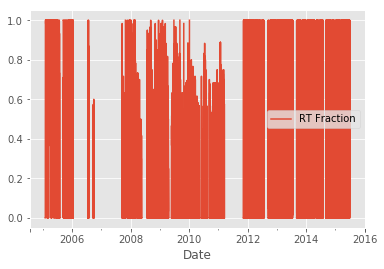

In [42]:
df.plot(y=['RT Fraction'])

In [43]:
mask_rt_frac = df['RT Fraction'] > 0.9
df = df[mask_rt_frac]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


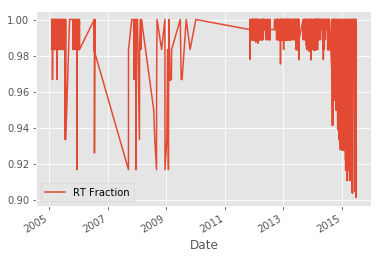

In [44]:
df.plot(y=['RT Fraction'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


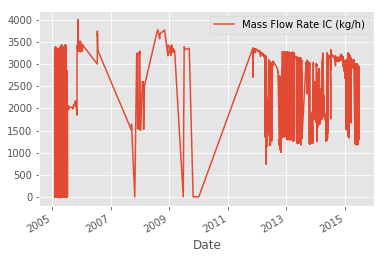

In [45]:
df.plot(y=['Mass Flow Rate IC (kg/h)'])

In [46]:
mask_flow_rate = df['Mass Flow Rate IC (kg/h)'] > 500
df = df[mask_flow_rate]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


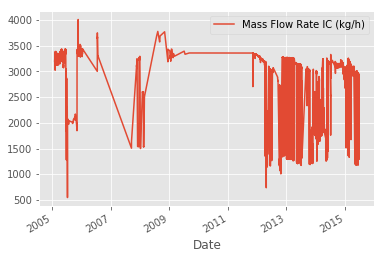

In [47]:
df.plot(y=['Mass Flow Rate IC (kg/h)'])

In [48]:
def get_cp(temp):
    temp_in_k = temp + 273.15
    return PropsSI('C', 'T', temp_in_k, 'P', 101325, 'Water') / 1000

In [49]:
df['IC Mean Temp (C)'] = (df['TinIC (C)'] + df['ToutIC (C)']) / 2
df.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,NaN,1.035532,NaN,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,NaN,1.018430,NaN,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300


In [50]:
df = df[df['IC Mean Temp (C)'].notnull()]
df.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,NaN,1.035532,NaN,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,NaN,1.018430,NaN,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300


In [51]:
df['CP (kJ/kg-K)'] = df['IC Mean Temp (C)'].apply(get_cp)
df.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,1.035532,NaN,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367,4.187236
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,1.018430,NaN,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300,4.187179


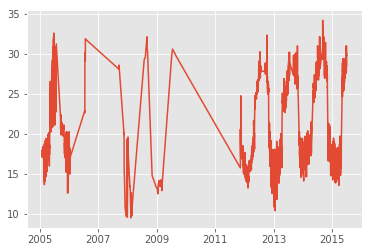

In [52]:
plt.plot(df['TinEC (C)'])

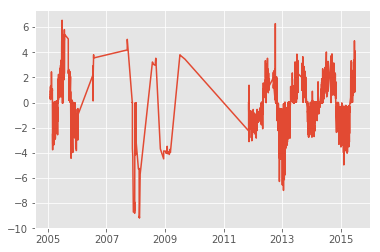

In [53]:
plt.plot(df['ToutIC (C)'] - df['TinIC (C)'])

In [54]:
mask_heating = (df['ToutIC (C)'] - df['TinIC (C)']) > 0
df_heating = df[mask_heating].copy()
df_heating.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,1.035532,NaN,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367,4.187236
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,1.018430,NaN,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300,4.187179


In [55]:
mask_cooling = ~mask_heating
df_cooling = df[mask_cooling].copy()
df_cooling.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-28 07:00:00,18.441667,18.939033,18.391650,18.596417,18.46495,18.704150,18.498217,18.74005,18.461050,18.709017,...,0.890026,NaN,18.607850,25.310317,18.610783,23.028150,NaN,1.0,24.169233,4.181674
2005-02-28 08:00:00,18.461083,18.944983,18.411033,18.604333,18.48705,18.712283,18.517283,18.74750,18.480117,18.716283,...,0.876160,NaN,18.622933,35.459450,18.624667,33.061983,NaN,1.0,34.260717,4.179292


In [56]:
df_cooling['Cooling Delivered (kW)'] = df_cooling['Mass Flow Rate IC (kg/h)'] * df_cooling['CP (kJ/kg-K)'] * abs(df_cooling['TinIC (C)'] - df_cooling['ToutIC (C)']) / 3600
df_cooling.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),Cooling Delivered (kW)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-28 07:00:00,18.441667,18.939033,18.391650,18.596417,18.46495,18.704150,18.498217,18.74005,18.461050,18.709017,...,NaN,18.607850,25.310317,18.610783,23.028150,NaN,1.0,24.169233,4.181674,8.277969
2005-02-28 08:00:00,18.461083,18.944983,18.411033,18.604333,18.48705,18.712283,18.517283,18.74750,18.480117,18.716283,...,NaN,18.622933,35.459450,18.624667,33.061983,NaN,1.0,34.260717,4.179292,8.731681


In [57]:
df_heating['Heating Delivered (kW)'] = df_heating['Mass Flow Rate IC (kg/h)'] * df_heating['CP (kJ/kg-K)'] * abs(df_heating['TinIC (C)'] - df_heating['ToutIC (C)']) / 3600
df_heating.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),Heating Delivered (kW)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,NaN,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367,4.187236,3.330325
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,NaN,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300,4.187179,3.193308


In [58]:
df_cooling['COP'] = df_cooling['Cooling Delivered (kW)'] / df_cooling['P_EC(kW)']
df_cooling.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),Cooling Delivered (kW),COP
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-28 07:00:00,18.441667,18.939033,18.391650,18.596417,18.46495,18.704150,18.498217,18.74005,18.461050,18.709017,...,18.607850,25.310317,18.610783,23.028150,NaN,1.0,24.169233,4.181674,8.277969,2.112312
2005-02-28 08:00:00,18.461083,18.944983,18.411033,18.604333,18.48705,18.712283,18.517283,18.74750,18.480117,18.716283,...,18.622933,35.459450,18.624667,33.061983,NaN,1.0,34.260717,4.179292,8.731681,1.812236


In [59]:
df_heating['COP'] = df_heating['Heating Delivered (kW)'] / df_heating['P_EC(kW)']
df_heating.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),Heating Delivered (kW),COP
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 14:00:00,46.426717,44.167517,14.881250,16.940617,3203.355129,2795.749650,2.512922,1.035336,15.571733,16.88725,...,17.272667,15.737450,16.685867,16.631283,NaN,1.0,16.184367,4.187236,3.330325,1.327552
2005-02-01 15:00:00,46.250100,44.492417,15.446033,17.046017,3194.921213,2796.079038,2.008052,1.017962,15.334133,16.94085,...,17.273300,15.812633,16.743167,16.671967,NaN,1.0,16.242300,4.187179,3.193308,1.533051


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


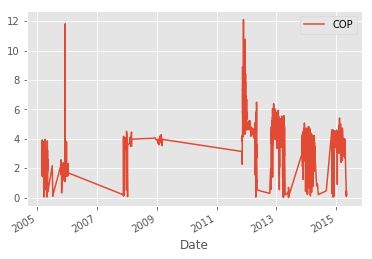

In [60]:
df_cooling.plot(y=['COP'])

In [61]:
df_cooling_cop = df_cooling['Mass Flow Rate IC (kg/h)']
df_cooling_cop.describe()

count    5173.000000
mean     2738.786034
std       738.014205
min      1012.022291
25%      1917.935363
50%      3168.110000
75%      3294.426089
max      4010.549204
Name: Mass Flow Rate IC (kg/h), dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


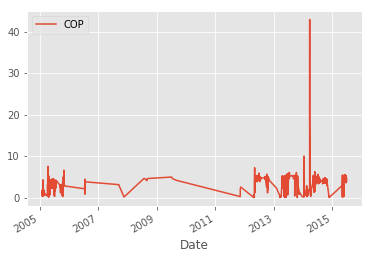

In [62]:
df_heating.plot(y=['COP'])

In [63]:
df_heating_cop = df_heating['Mass Flow Rate IC (kg/h)']
df_heating_cop.describe()

count    3884.000000
mean     2705.765060
std       734.821814
min       546.864506
25%      2152.289211
50%      3092.816902
75%      3173.444581
max      3778.874167
Name: Mass Flow Rate IC (kg/h), dtype: float64

In [64]:
bin_1 = np.arange(4, 28, 2)#[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
bin_2 = np.arange(-0.125, 1.5, 0.25) #[-0.125, 0.125, 0.375, 0.625, 0.875, 1.125]

cooling_bins = binned_statistic_2d(df_cooling['TinEC (C)'], df_cooling['RT Fraction'], df_cooling['COP'], statistic='mean', bins=[bin_1, bin_2]).statistic 
heating_bins = binned_statistic_2d(df_heating['TinEC (C)'], df_heating['RT Fraction'], df_heating['COP'], statistic='mean', bins=[bin_1, bin_2]).statistic

In [65]:
bin_1

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26])

In [66]:
bin_2

array([-0.125,  0.125,  0.375,  0.625,  0.875,  1.125,  1.375])

In [67]:
cooling_bins

array([[       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan, 3.7833502 ,
               nan],
       [       nan,        nan,        nan,        nan, 4.45784525,
               nan],
       [       nan,        nan,        nan,        nan, 4.67016407,
               nan],
       [       nan,        nan,        nan,        nan, 4.53803073,
               nan],
       [       nan,        nan,        nan,        nan, 4.04787489,
               nan],
       [       nan,        nan,        nan,        nan, 3.08419154,
               nan],
       [       nan,        nan,        nan,        nan, 2.02024623,
               nan],
       [       nan,        nan,        nan,        nan, 0.78917517,
               nan],
       [       nan,        nan,        nan,        nan, 0.61086682,
               nan]])

In [68]:
bin_test = bin_2[:-1]
bin_test

array([-0.125,  0.125,  0.375,  0.625,  0.875,  1.125])

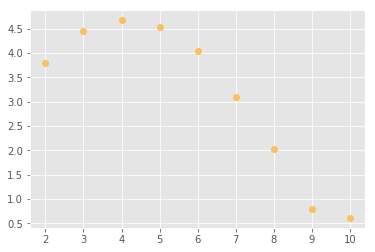

In [69]:
plt.plot(cooling_bins, 'o')

In [70]:
heating_bins

array([[       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan, 1.4699984 ,
               nan],
       [       nan,        nan,        nan,        nan, 2.1573898 ,
               nan],
       [       nan,        nan,        nan,        nan, 2.4965772 ,
               nan],
       [       nan,        nan,        nan,        nan, 3.30709499,
               nan],
       [       nan,        nan,        nan,        nan, 3.96094741,
               nan]])

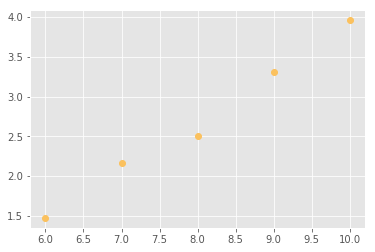

In [77]:
plt.plot(heating_bins, 'o')

In [72]:
cooling_count = binned_statistic_2d(df_cooling['TinEC (C)'], df_cooling['RT Fraction'], df_cooling['COP'], statistic='count', bins=[bin_1, bin_2]).statistic 
heating_count = binned_statistic_2d(df_heating['TinEC (C)'], df_heating['RT Fraction'], df_heating['COP'], statistic='count', bins=[bin_1, bin_2]).statistic

In [73]:
cooling_count

array([[   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,   10.,    0.],
       [   0.,    0.,    0.,    0.,   21.,    0.],
       [   0.,    0.,    0.,    0.,  135.,    0.],
       [   0.,    0.,    0.,    0., 1280.,    0.],
       [   0.,    0.,    0.,    0., 2056.,    0.],
       [   0.,    0.,    0.,    0., 1517.,    0.],
       [   0.,    0.,    0.,    0.,  116.,    0.],
       [   0.,    0.,    0.,    0.,    7.,    0.],
       [   0.,    0.,    0.,    0.,   28.,    0.]])

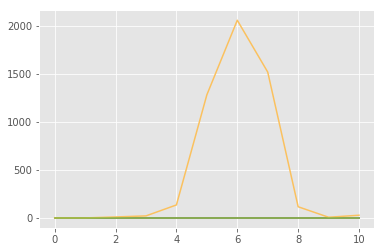

In [74]:
plt.plot(cooling_count)

In [75]:
heating_count

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 248.,   0.],
       [  0.,   0.,   0.,   0., 171.,   0.],
       [  0.,   0.,   0.,   0., 255.,   0.],
       [  0.,   0.,   0.,   0., 324.,   0.],
       [  0.,   0.,   0.,   0., 697.,   0.]])

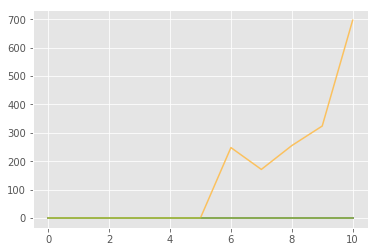

In [76]:
plt.plot(heating_count)